In [ ]:
!pip install bigartm

In [ ]:
!pip install protobuf==3.20.3

In [14]:
from artm import BatchVectorizer

In [15]:
import pandas as pd

In [ ]:
test_data = pd.read_parquet('drive/MyDrive/nlp/data/0000_test.parquet', 'pyarrow')
train_data = pd.read_parquet('drive/MyDrive/nlp/data/0000_train.parquet', 'pyarrow')

In [ ]:
train_data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,summary,topic,url,title,date
0,Сладострастник в течение трех лет преследовал ...,Старший преподаватель института коммунального ...,incident,https://www.mk.ru/incident/article/2010/01/05/...,Педофил преследовал подростка три года,06/01/2010
1,Буквально за час до боя курантов в подземном п...,Манежная площадь Москвы стала местом последнег...,incident,https://www.mk.ru/incident/article/2010/01/05/...,Таджики устроили резню на Манежной площади под...,06/01/2010
2,"Там они покатались на лыжах и снегоходах, пооб...",Президент РФ Дмитрий Медведев с семьей проводи...,politics,https://www.mk.ru/politics/article/2010/01/05/...,"""""""За все платит президент""""""",06/01/2010
3,Сосед расстрелял соседа из-за претензий по пов...,Первое убийство в 2010 году произошло в Москве...,incident,https://www.mk.ru/incident/article/2010/01/05/...,Первое убийство года спровоцировал потоп,06/01/2010
4,Причиной трагедии специалисты считают нарушени...,"Шесть человек, в том числе 9-летний ребенок, з...",incident,https://www.mk.ru/incident/article/2010/01/05/...,Целая семья не пережила газовой атаки,06/01/2010
...,...,...,...,...,...,...
25551,"— Георгий Евгеньевич, складывается впечатление...",Они чувствуют себя чужими в мире взрослых и тя...,social,https://www.mk.ru/social/2013/03/19/828147-kak...,Как не стать педофилом?,20/03/2013
25552,"Открывая заседание, президент ассоциации Валер...",К такому выводу пришли представители малых и с...,mosobl,https://www.mk.ru/mosobl/2013/03/19/828148-ray...,Райсовет — на обочине,20/03/2013
25553,На улице Марины Цветаевой и на соседней Спарта...,Власти Подмосковья в лице врио губернатора Анд...,mosobl,https://www.mk.ru/mosobl/2013/03/19/828197-po-...,По закону против джунглей,20/03/2013
25554,Что не нравится жителям города? В последние го...,В Клину строительство высотки в исторической ч...,mosobl,https://www.mk.ru/mosobl/2013/03/19/828203-mes...,Местный батюшка получил место в торговых рядах,20/03/2013


In [ ]:
test_data = test_data[['text', 'topic']]
test_data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,topic
0,"Миллениалы, которые не знают, уходит электриче...",science
1,"Если верить южнокорейскому изданию, ссылающему...",politics
2,ЦИТАТА ДНЯ Андрей ВОРОБЬЕВ: «Наша ключевая зад...,mosobl
3,В честь юбилея она выпустила клип на песню «Ка...,culture
4,СПРАВКА «МК» 25 апреля 2019 года полковник бан...,social
...,...,...
752,"Виктория сыграла фронтовичку, вернувшуюся в Ле...",culture
753,"— Михаил Владимирович, начнем со «Спартака», о...",sport
754,Полный «тамам» И все же главная цель поездки д...,politics
755,}); - Не только в плане женщин считал себя эст...,incident


In [ ]:
train_data = train_data[['text', 'topic']]

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.3 MB/s eta 0:00:00


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

import string
from pymorphy3 import MorphAnalyzer
import spacy

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!python -m spacy download ru_core_news_md

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 18.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
spacy_ru = spacy.load('ru_core_news_md')
stopwords_list = set(stopwords.words('russian'))

In [ ]:
pattern = re.compile(r'[^а-я]+')
# texts = [train_data['text'][index].lower() for index in train_data.index]
text = "!Я хочу идти гулять /n, а не заниматься не понять чем здесь."
text = text.lower()
text = pattern.sub(' ', text).strip()

doc = spacy_ru(text)
word_list = [word.lemma_ for word in doc]

# word_list = word_tokenize(text, language='russian')

['я', 'хотеть', 'идти', 'гулять', 'а', 'не', 'заниматься', 'не', 'понять', 'чем', 'здесь']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(word_list)

[]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
spacy.load('ru_core_news_md')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def preprocess(text: str) -> str:
    pattern = re.compile(r'[^а-я]+')
    text = text.lower()
    text = pattern.sub(' ', text).strip()

    doc = spacy_ru(text)
    words_list = [word.lemma_ for word in doc]
    stopwords_list = set(stopwords.words('russian'))

    words_list = [word for word in words_list if word not in stopwords_list and len(word)>2]

    text = ' '.join(words_list)

    return text

In [ ]:
for i, text in enumerate(train_data['text']):
    train_data['text'][i] = preprocess(text)

    if (i + 1) % 1000 == 0:
        print(f'Документ номер: {i + 1}')


<ipython-input-93-9e638db74b66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'][i] = preprocess(text)


Документ номер: 1000
Документ номер: 2000
Документ номер: 3000
Документ номер: 4000
Документ номер: 5000
Документ номер: 6000
Документ номер: 7000


<ipython-input-93-9e638db74b66>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['text'][i] = preprocess(text)


Документ номер: 8000
Документ номер: 9000
Документ номер: 10000
Документ номер: 11000
Документ номер: 12000
Документ номер: 13000
Документ номер: 14000
Документ номер: 15000
Документ номер: 16000
Документ номер: 17000
Документ номер: 18000
Документ номер: 19000
Документ номер: 20000
Документ номер: 21000
Документ номер: 22000
Документ номер: 23000
Документ номер: 24000
Документ номер: 25000


In [ ]:
test_data['text'] = test_data['text'].apply(lambda x: preprocess(x))

In [ ]:
train_data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,topic
0,сладострастник течение год преследовать подрос...,incident
1,буквально час бой курант подземный переход ста...,incident
2,покататься лыжа снегоход пообщаться другими от...,politics
3,сосед расстрелять сосед претензия повод затопл...,incident
4,причина трагедия специалист считать нарушение ...,incident
...,...,...
25551,георгий евгениевич складываться впечатление ро...,social
25552,открывать заседание президент ассоциация валер...,mosobl
25553,улица марина цветаев соседний спартаковский вр...,mosobl
25554,нравиться житель город последний год древний к...,mosobl


In [ ]:
from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()

In [ ]:
def is_valid_russian_word(word):
    parsed = morph.parse(word)[0]
    allowed_pos = {'NOUN', 'ADJF', 'ADJS', 'VERB', 'INFN', 'ADVB', 'NUMR'}
    return any(pos in parsed.tag for pos in allowed_pos)

In [ ]:
print([word for word in train_data['text'][0].split() if not is_valid_russian_word(word)])

['именно', 'это', 'обо', 'кстати', 'реб']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
!pip install swifter

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 11.5 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=b3c9ff2689675f09efa7a76e4bddf66c97dc7ebd8a3e8299a768a3ed4ee62706
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [102]:
import swifter

train_data["text"] = train_data["text"].swifter.apply(
    lambda x: " ".join([word for word in x.split() if is_valid_russian_word(word)])
)

Pandas Apply:   0%|          | 0/25556 [00:00<?, ?it/s]

In [104]:
# train_data["text"] = [" ".join([word for word in list_words.split() if is_valid_russian_word(word)])
#                             for list_words in train_data["text"]]

In [103]:
test_data["text"] = [" ".join([word for word in list_words.split() if is_valid_russian_word(word)]) for list_words in test_data["text"]]

In [105]:
import pickle

with open('drive/MyDrive/nlp/data/better_preprocessed_TRAIN_lda_data', 'wb') as f:
  pickle.dump(train_data, f)

with open('drive/MyDrive/nlp/data/better_preprocessed_TEST_lda_data', 'wb') as f:
  pickle.dump(test_data, f)

In [3]:
import pickle

with open('drive/MyDrive/nlp/data/better_preprocessed_TRAIN_lda_data', 'rb') as f:
    train_data = pickle.load(f)

with open('drive/MyDrive/nlp/data/better_preprocessed_TEST_lda_data', 'rb') as f:
    test_data = pickle.load(f)


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizer = CountVectorizer(max_df=.5, min_df=2, ngram_range=(1, 3), max_features=20_000)

train_data_vectors = vectorizer.fit_transform(train_data['text'])
test_data_vectors = vectorizer.fit_transform(test_data['text'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
n_wd = train_data_vectors.todense().T
test_n_wd = test_data_vectors.todense().T

In [29]:
vocab = vectorizer.get_feature_names_out()
vocab

array(['аббревиатура', 'абзац', 'абишевич', ..., 'ящик', 'ёлка',
       'ёмкость'], dtype=object)

In [30]:
batch_vectorizer = BatchVectorizer(data_format='bow_n_wd', n_wd=n_wd,
                                   vocabulary=vocab, target_folder='drive/MyDrive/nlp/data/train_batches')

test_batch_vectorizer = BatchVectorizer(data_format='bow_n_wd', n_wd=test_n_wd,
                                        vocabulary=vocab, target_folder='drive/MyDrive/nlp/data/test_batches') #

/usr/local/lib/python3.11/dist-packages/artm/batches_utils.py:227: DeprecationWarning: Please import `spmatrix` from the `scipy.sparse` namespace; the `scipy.sparse.base` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.sparse.base import spmatrix


## LDA

In [12]:
import artm

### Обучающая выборка

In [ ]:
# dict.save(dictionary_path='train_dictionary')
# dict_load = dict.load(dictionary_path='train_dictionary')

In [ ]:
# lda = artm.LDA(num_topics=20, num_document_passes=10, dictionary=batch_vectorizer.dictionary)
# lda.fit_offline(batch_vectorizer, num_collection_passes=10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# lda.perplexity_value

[19750.5078125,
 5308.7216796875,
 5121.77734375,
 4700.3955078125,
 4264.61181640625,
 3993.619140625,
 3826.18212890625,
 3711.621337890625,
 3630.531494140625,
 3573.05029296875]

In [16]:
# imported_batch_vectorizer = BatchVectorizer(data_path='drive/MyDrive/train_batches')
# dictionary = artm.Dictionary()
# dictionary.gather(data_path='drive/MyDrive/nlp/data/train_batches')

In [31]:
def lda_fit(num_topics: int):
  lda = artm.LDA(num_topics=num_topics, num_document_passes=10, dictionary=batch_vectorizer.dictionary)
  # lda.initialize(dictionary=dictionary)
  lda.fit_offline(batch_vectorizer, num_collection_passes=10)
  results = {"perplexity_score": lda.perplexity_value, "model": lda}

  return results


In [32]:
num_topics = [10, 15, 20, 25, 30]
results = {}

for num in num_topics:
  results[num] = lda_fit(num)
  print(f'Topics#{num}: {results[num]["perplexity_score"]}')

Topics#10: [19782.126953125, 6320.630859375, 6138.69140625, 5741.65283203125, 5317.29931640625, 5046.32177734375, 4870.0078125, 4737.041015625, 4632.1962890625, 4549.45361328125]
Topics#15: [19751.193359375, 6279.046875, 5967.869140625, 5354.67919921875, 4822.96923828125, 4529.1455078125, 4362.2646484375, 4259.5712890625, 4192.44873046875, 4145.689453125]
Topics#20: [19738.140625, 6264.1181640625, 5908.998046875, 5219.28369140625, 4667.07080078125, 4369.5498046875, 4198.322265625, 4093.455322265625, 4026.10986328125, 3980.25537109375]
Topics#25: [19721.32421875, 6250.02685546875, 5851.3857421875, 5110.82177734375, 4558.880859375, 4262.7216796875, 4095.25927734375, 3992.609375, 3923.8408203125, 3874.597900390625]
Topics#30: [19717.958984375, 6242.36474609375, 5824.15771484375, 5061.9111328125, 4504.8984375, 4203.96484375, 4030.230224609375, 3919.316650390625, 3843.75439453125, 3791.265869140625]


In [33]:
import matplotlib.pyplot as plt

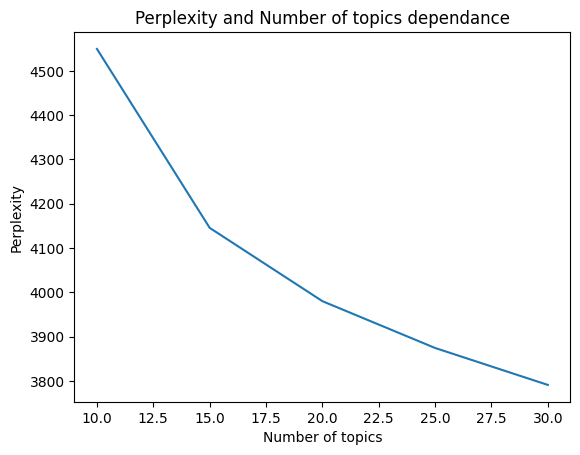

In [34]:
plt.title('Perplexity and Number of topics dependance')
plt.plot(num_topics, [results[num]['perplexity_score'][-1] for num in num_topics])
plt.xlabel('Number of topics')
plt.ylabel('Perplexity')
plt.show()

In [35]:
best_model = results[30]['model']

In [36]:
top_tokens = best_model.get_top_tokens(num_tokens=10)

for i, token_list in enumerate(top_tokens):
  print(f'Topic #{i}: {", ".join(token_list)}')

Topic #0: филёвский, пенсионный накопление, жёлтый, подача, колея, измерение, ребята, идеологический, которые ещё, решение правительство
Topic #1: обязывать, мчаться, гособвинитель, разный лицо, стоять, набирать, заверять, обменить, набоков, программа активный
Topic #2: российский лидер, детский юношеский, экономика мир, вата, росизо, батюшка, звери, думский комитет, центр стать, пилотный регион
Topic #3: второй президент, печаль, лёгкий, борисович, задача, осуществлять контроль, бондарчук, мир жить, десять год, зона аэропорт
Topic #4: десять год, идеологический, сестрёнка, хотеть идти, оценка, влксм, дядя, превратиться, поэтому должный, жёлтый
Topic #5: вырастить, период время, джинсы, возвести, качество работа, портить, государственный управление, сначала, чистый, населить
Topic #6: пушкинский музей, дон, общевойсковой, дом музей, контакт человек, пятиэтажка, отклик, слабый, причина, скромный
Topic #7: пресса, психбольница, стесняться, ринг, узи, портить, главный тренер, мораль, врем

In [43]:
best_model.phi_

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
авансцена,8.176047e-05,2.130406e-04,4.505408e-04,8.410022e-05,8.930810e-05,2.586432e-04,2.129652e-04,1.589098e-04,0.000120,2.945611e-06,...,1.693130e-04,0.000757,2.372358e-05,6.581000e-05,0.000930,8.050342e-06,3.309108e-04,1.692399e-04,8.909155e-05,1.125589e-03
аварийный,1.231308e-05,4.781539e-05,1.054804e-04,2.567998e-05,8.008549e-05,2.946485e-05,1.612099e-05,3.678537e-05,0.000007,2.316928e-06,...,3.583434e-05,0.000225,9.040217e-06,1.950313e-05,0.000190,1.097872e-05,8.431276e-06,1.336639e-05,2.412241e-05,7.902643e-05
алексеев,1.061663e-06,3.940440e-08,3.928078e-08,7.963365e-06,5.988389e-07,3.698566e-08,4.800798e-08,4.357049e-08,0.000036,1.208064e-06,...,5.514443e-08,0.000003,1.062241e-07,3.584592e-05,0.000026,9.434017e-07,2.964635e-08,1.841026e-06,4.734596e-08,3.661917e-07
балкарский,1.129583e-04,2.093485e-07,6.054682e-07,5.959451e-05,4.345164e-04,6.930858e-06,4.283710e-06,3.205911e-07,0.000054,4.091235e-06,...,9.880923e-07,0.000107,8.038136e-07,2.331505e-05,0.000007,1.931867e-05,2.857905e-06,1.595555e-03,6.081787e-08,5.909527e-06
бесчисленный,2.952334e-05,8.429962e-05,6.681803e-08,7.680201e-08,1.948640e-04,5.070958e-07,2.048550e-07,6.858183e-06,0.000053,3.482475e-05,...,1.213576e-07,0.000001,1.298774e-06,5.667834e-05,0.000235,7.249487e-06,1.171039e-04,3.752437e-06,2.336012e-05,3.969856e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
расползаться,3.753235e-07,7.827932e-08,3.509787e-05,1.083921e-05,1.388491e-06,8.458017e-06,2.212483e-06,1.711957e-05,0.000059,1.477897e-07,...,2.237671e-06,0.000029,9.431173e-08,5.191068e-07,0.000120,2.304896e-05,4.470131e-08,4.283758e-07,6.722006e-07,1.252674e-05
расположение,5.158562e-07,6.299237e-08,2.578445e-05,1.061172e-05,2.308502e-07,7.474023e-06,2.509489e-07,2.331175e-05,0.000051,1.419504e-07,...,3.098467e-06,0.000026,1.544030e-07,6.840194e-07,0.000117,2.702400e-05,1.412910e-07,2.751229e-06,1.650289e-06,1.635801e-05
который найти,5.329899e-08,3.821505e-08,4.096391e-05,1.237226e-05,6.764454e-07,3.390764e-06,8.831071e-07,1.489668e-05,0.000047,2.638699e-07,...,2.204490e-06,0.000010,7.462692e-08,3.184619e-07,0.000082,1.880733e-05,4.274114e-08,1.675641e-06,4.516289e-06,1.920816e-06
который находиться,3.999814e-07,3.673887e-08,3.878004e-05,1.277628e-05,9.237903e-07,3.041869e-06,1.493259e-06,1.406599e-05,0.000047,2.987482e-07,...,2.524996e-06,0.000015,7.997294e-08,6.212000e-07,0.000083,2.184375e-05,4.364693e-08,2.499437e-06,3.559339e-06,5.135209e-06


### Тестовая выборка

In [46]:
test_theta = best_model.transform(test_batch_vectorizer)
test_theta

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,747,748,749,750,751,752,753,754,755,756
topic_0,0.028220,0.050183,0.073102,0.002755,0.059907,0.080867,0.030084,0.047795,0.127404,0.014530,...,0.041886,0.044532,0.052564,0.035418,0.034108,0.046408,0.074286,0.032092,0.030813,0.003950
topic_1,0.071511,0.025230,0.062577,0.005786,0.016435,0.029628,0.006657,0.070440,0.048142,0.011487,...,0.015305,0.015459,0.004990,0.014821,0.067938,0.053666,0.001980,0.034530,0.034782,0.000786
topic_2,0.087260,0.007408,0.021330,0.009024,0.026055,0.002959,0.032166,0.007688,0.056393,0.061742,...,0.002199,0.054044,0.012447,0.000196,0.047522,0.036342,0.030433,0.011992,0.029565,0.039889
topic_3,0.043173,0.051697,0.040324,0.095651,0.036008,0.012959,0.023064,0.052431,0.015357,0.028952,...,0.049480,0.022438,0.010310,0.001068,0.060325,0.011610,0.042149,0.065689,0.017474,0.012939
topic_4,0.098826,0.085510,0.012364,0.007438,0.035206,0.081578,0.082096,0.029591,0.090737,0.051853,...,0.030750,0.021669,0.016423,0.071547,0.018532,0.033181,0.006512,0.064873,0.024890,0.092606
topic_5,0.007158,0.019717,0.015743,0.029458,0.030945,0.060522,0.001204,0.024549,0.010544,0.034205,...,0.016938,0.005887,0.034371,0.057523,0.021107,0.043484,0.045852,0.009882,0.018314,0.066701
topic_6,0.001783,0.040707,0.004878,0.000473,0.010429,0.003012,0.000758,0.016782,0.018433,0.000242,...,0.002098,0.000539,0.013858,0.047215,0.005179,0.003147,0.034011,0.002573,0.005130,0.032358
topic_7,0.035321,0.000604,0.002162,0.017343,0.031225,0.017916,0.020479,0.018345,0.039661,0.026410,...,0.027601,0.048038,0.001749,0.013521,0.018916,0.017835,0.018826,0.024013,0.012253,0.118959
topic_8,0.014063,0.061889,0.065151,0.081862,0.037123,0.024982,0.053824,0.050543,0.033516,0.018813,...,0.044061,0.022525,0.070124,0.025307,0.011500,0.020304,0.050659,0.021624,0.012562,0.010254
topic_9,0.052735,0.026027,0.059777,0.026874,0.038949,0.006439,0.035325,0.007913,0.027867,0.038696,...,0.016262,0.020462,0.005750,0.034868,0.028275,0.005896,0.018289,0.017286,0.043184,0.032837


## Регуляризация с ARTM

### Обучающая выборка

In [48]:
artm_model = artm.ARTM(
    num_topics=20,
    cache_theta=True,
    scores=[artm.PerplexityScore(name='PerplexityScore', dictionary=batch_vectorizer.dictionary),
            artm.TopTokensScore(name='TopTokensScore')],
    regularizers=[
        artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15),
        artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2),
        artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=5)
    ]
)

In [49]:
artm_model.initialize(dictionary=batch_vectorizer.dictionary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
artm_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
perplexity_score = artm_model.score_tracker['PerplexityScore'].value
top_tokens = artm_model.score_tracker['TopTokensScore']

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
for topic_name in artm_model.topic_names:
  print(f'{topic_name}: {top_tokens.last_tokens[topic_name]}')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_0: ['филёвский', 'пенсионный накопление', 'жёлтый', 'идеологический', 'ребята', 'решение правительство', 'аспект', 'судимость', 'измерение', 'колея']
topic_1: ['обязывать', 'мчаться', 'гособвинитель', 'разный лицо', 'стоять', 'набирать', 'заверять', 'обменить', 'программа активный', 'доставаться']
topic_2: ['российский лидер', 'центр стать', 'детский юношеский', 'ростов дон', 'концепция', 'мочь любой', 'батюшка', 'вата', 'близкий неделя', 'росизо']
topic_3: ['второй президент', 'печаль', 'лёгкий', 'борисович', 'задача', 'мир жить', 'осуществлять контроль', 'бондарчук', 'зона аэропорт', 'десять год']
topic_4: ['десять год', 'идеологический', 'сестрёнка', 'поисковик', 'министр образование', 'оценка', 'хотеть идти', 'влксм', 'бульварный', 'дядя']
topic_5: ['вырастить', 'период время', 'возвести', 'джинсы', 'качество работа', 'портить', 'замуж', 'государственный управление', 'сначала', 'главный тренер']
topic_6: ['дон', 'дом музей', 'пушкинский музей', 'председатель правительство', '

In [64]:
perplexity_score

[19721.498046875,
 6301.1220703125,
 6003.52978515625,
 5350.82568359375,
 4762.54541015625,
 4434.24072265625,
 4247.58251953125,
 4135.3935546875,
 4064.0966796875,
 4015.563232421875]

In [65]:
np.arange(len(perplexity_score))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

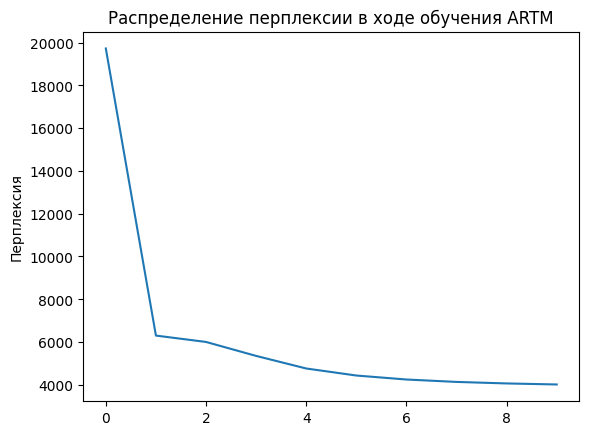

In [67]:
plt.plot(np.arange(len(perplexity_score)), perplexity_score)
plt.ylabel("Перплексия")
plt.title("Распределение перплексии в ходе обучения ARTM")
plt.show()

### Тестовая выборка



In [69]:
theta_artm_test = artm_model.transform(batch_vectorizer=batch_vectorizer)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
theta_artm_test

,15000,15001,15002,15003,15004,15005,15006,15007,15008,15009,...,20990,20991,20992,20993,20994,20995,20996,20997,20998,20999
topic_0,0.000513,0.000000,0.000000,0.051406,0.000000,0.000000,0.001028,0.025192,0.000033,0.000000,...,0.035352,0.016180,0.002068,0.051194,0.001647,0.012538,0.036098,0.168020,0.573314,0.000000
topic_1,0.000000,0.278892,0.261675,0.000000,0.028583,0.000000,0.005803,0.000000,0.029396,0.005006,...,0.001515,0.025571,0.004066,0.445750,0.140214,0.191509,0.000000,0.006019,0.000000,0.000000
topic_2,0.000000,0.173001,0.113215,0.000000,0.000000,0.015816,0.281949,0.000000,0.026305,0.099855,...,0.002156,0.000000,0.001851,0.183408,0.000000,0.121131,0.000000,0.014511,0.002739,0.440442
topic_3,0.005973,0.000000,0.396508,0.000000,0.000000,0.016846,0.000000,0.000000,0.007256,0.000000,...,0.000800,0.491803,0.005599,0.015498,0.000000,0.006168,0.000000,0.002827,0.012114,0.000000
topic_4,0.005837,0.000000,0.000000,0.002305,0.191284,0.005668,0.000000,0.260390,0.014635,0.000000,...,0.000294,0.007067,0.031802,0.003628,0.004021,0.013900,0.141734,0.037536,0.121222,0.002557
topic_5,0.001614,0.015393,0.020535,0.003442,0.055170,0.191244,0.039780,0.001394,0.016337,0.165845,...,0.028572,0.001161,0.019629,0.000000,0.000000,0.018977,0.068334,0.085802,0.000000,0.007135
topic_6,0.016131,0.003380,0.000000,0.059052,0.062308,0.000000,0.171035,0.000000,0.003053,0.073017,...,0.012999,0.024702,0.178352,0.000056,0.205385,0.083267,0.000000,0.008153,0.003076,0.073858
topic_7,0.000000,0.047305,0.000000,0.181793,0.000000,0.029355,0.008702,0.003053,0.063905,0.189304,...,0.242954,0.000000,0.005260,0.011168,0.000000,0.190174,0.000000,0.033710,0.001108,0.299803
topic_8,0.000671,0.000000,0.006183,0.024510,0.098903,0.009328,0.000000,0.116377,0.000709,0.000000,...,0.005636,0.011469,0.000621,0.023086,0.021836,0.016789,0.283123,0.015704,0.031551,0.006332
topic_9,0.011115,0.000000,0.002590,0.007519,0.000672,0.243714,0.001891,0.060275,0.014602,0.006600,...,0.090000,0.004279,0.019120,0.050786,0.033602,0.004718,0.006653,0.042177,0.006062,0.013214
